## Wine Quality Data Set

Dataset URL: https://archive.ics.uci.edu/ml/datasets/wine+quality

The task here is to predict the quality of red wine on a scale of 0–10 given a set of features as inputs. I have solved it as a regression problem using Linear Regression.

**Attribute Information:**

For more information, read [Cortez et al., 2009].<br>
Input variables (based on physicochemical tests):<br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>
Output variable (based on sensory data):<br>
12 - quality (score between 0 and 10)<br>

In [2]:
# import necessary packages 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read dataset
data = pd.read_csv('winequality-red.csv')

In [4]:
data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


Here it's not comma seperated file. delimiter is semicolon. 

In [5]:
# Read dataset 
data = pd.read_csv('winequality-red.csv',sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.shape

(1599, 12)

## Missing values in dataset

In [7]:
# find missing values in data 
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Fortunately this dataset is clean** 

## Descriptive Statistics 

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


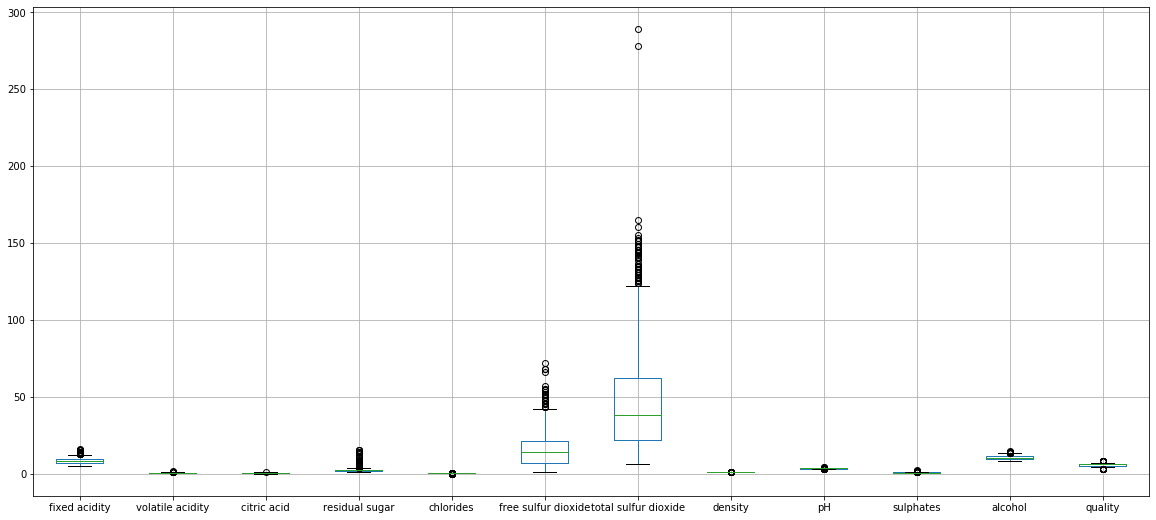

In [10]:
## Percentiles and Outliers using box plot
f, ax = plt.subplots(figsize=(20, 9))
data.boxplot()
plt.show()

## Correlation 

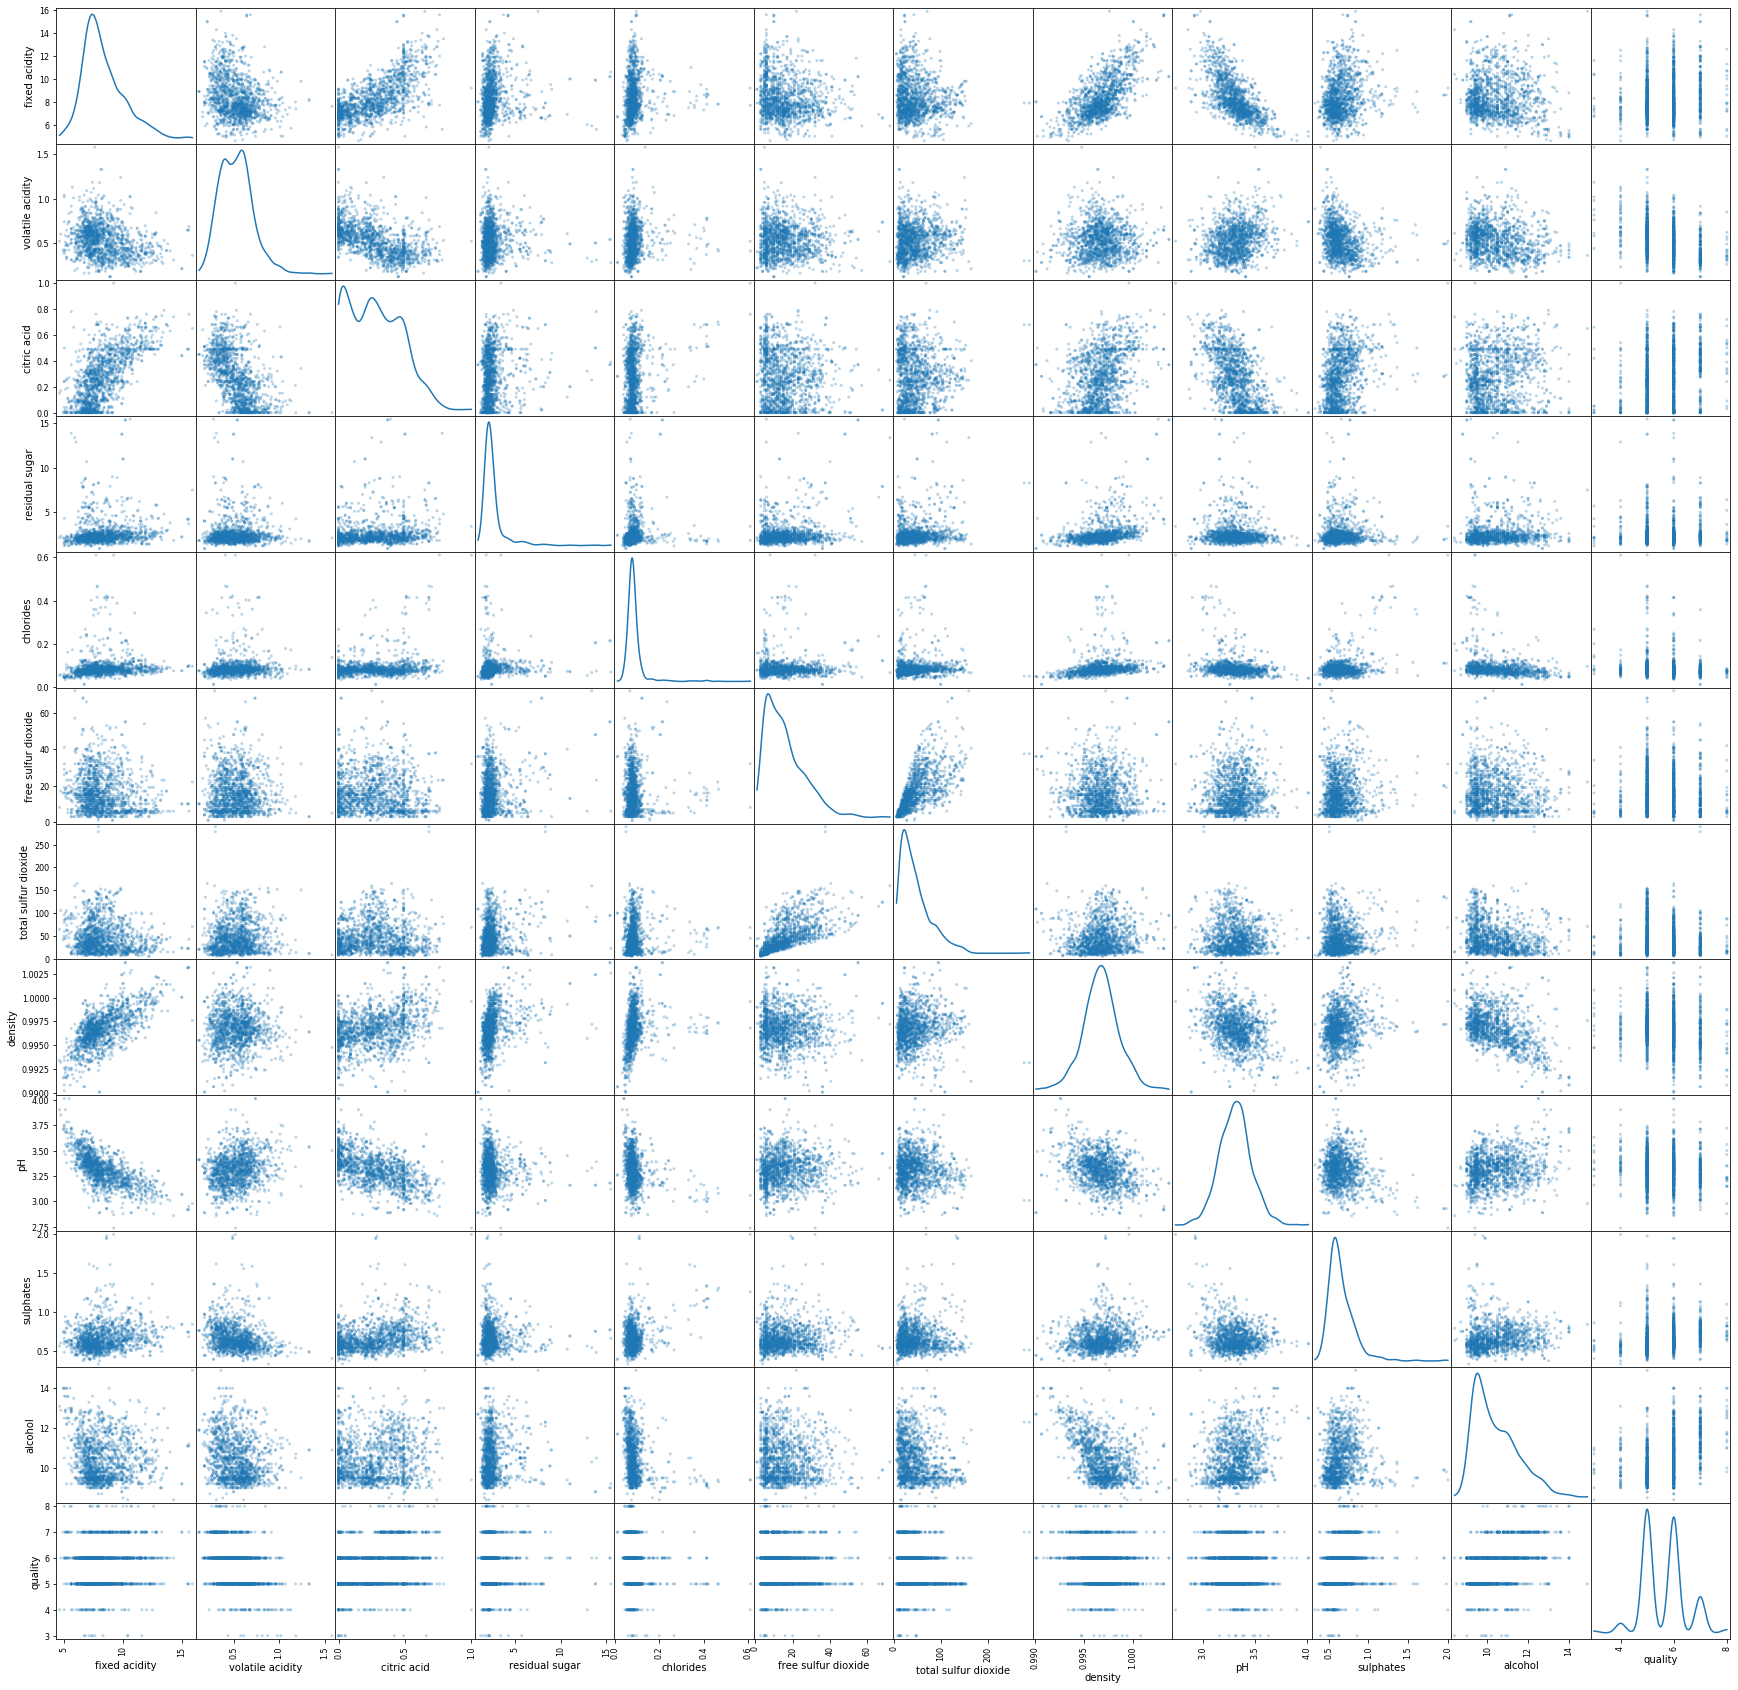

In [11]:
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (30,30), diagonal = 'kde');
plt.show()

In [12]:
# there are no categorical variables. each feature is a number. Regression problem. 
# Given the set of values for features, we have to predict the quality of wine. 
# finding correlation of each feature with our target variable - quality
correlations = data.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


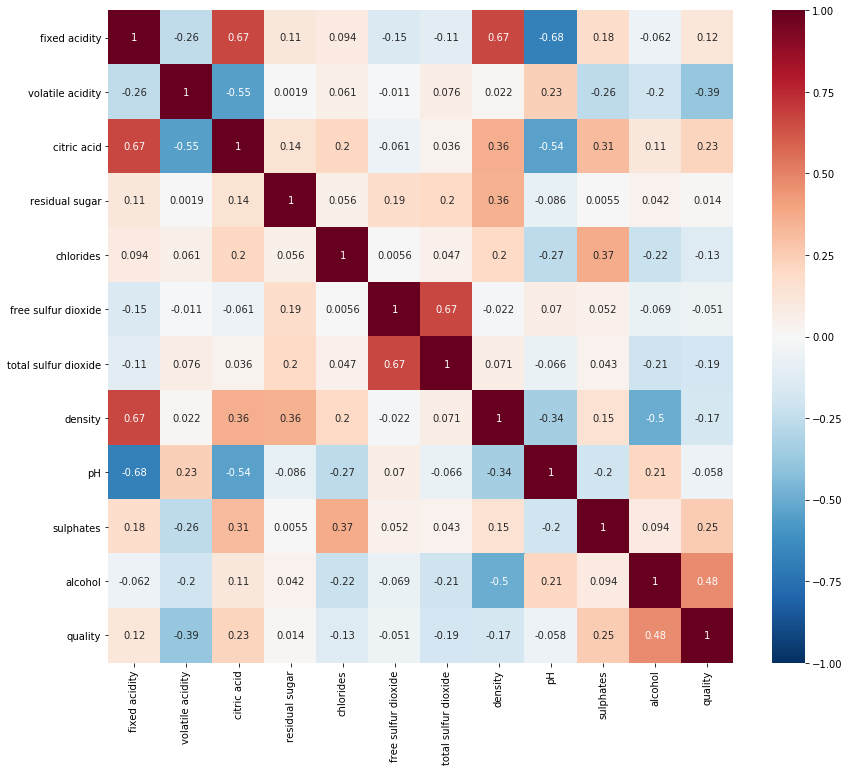

In [13]:
# correlation matrix
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(data.corr(), annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [14]:
for i, column in enumerate(data.columns):
    print(i,column)

0 fixed acidity
1 volatile acidity
2 citric acid
3 residual sugar
4 chlorides
5 free sulfur dioxide
6 total sulfur dioxide
7 density
8 pH
9 sulphates
10 alcohol
11 quality


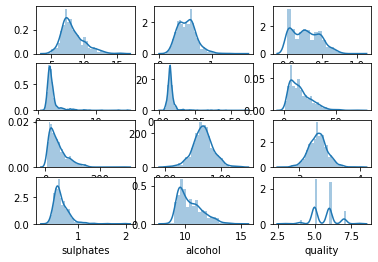

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=3)
for i, column in enumerate(data.columns):
    sns.distplot(data[column],ax=axes[i//3,i%3])
plt.show()

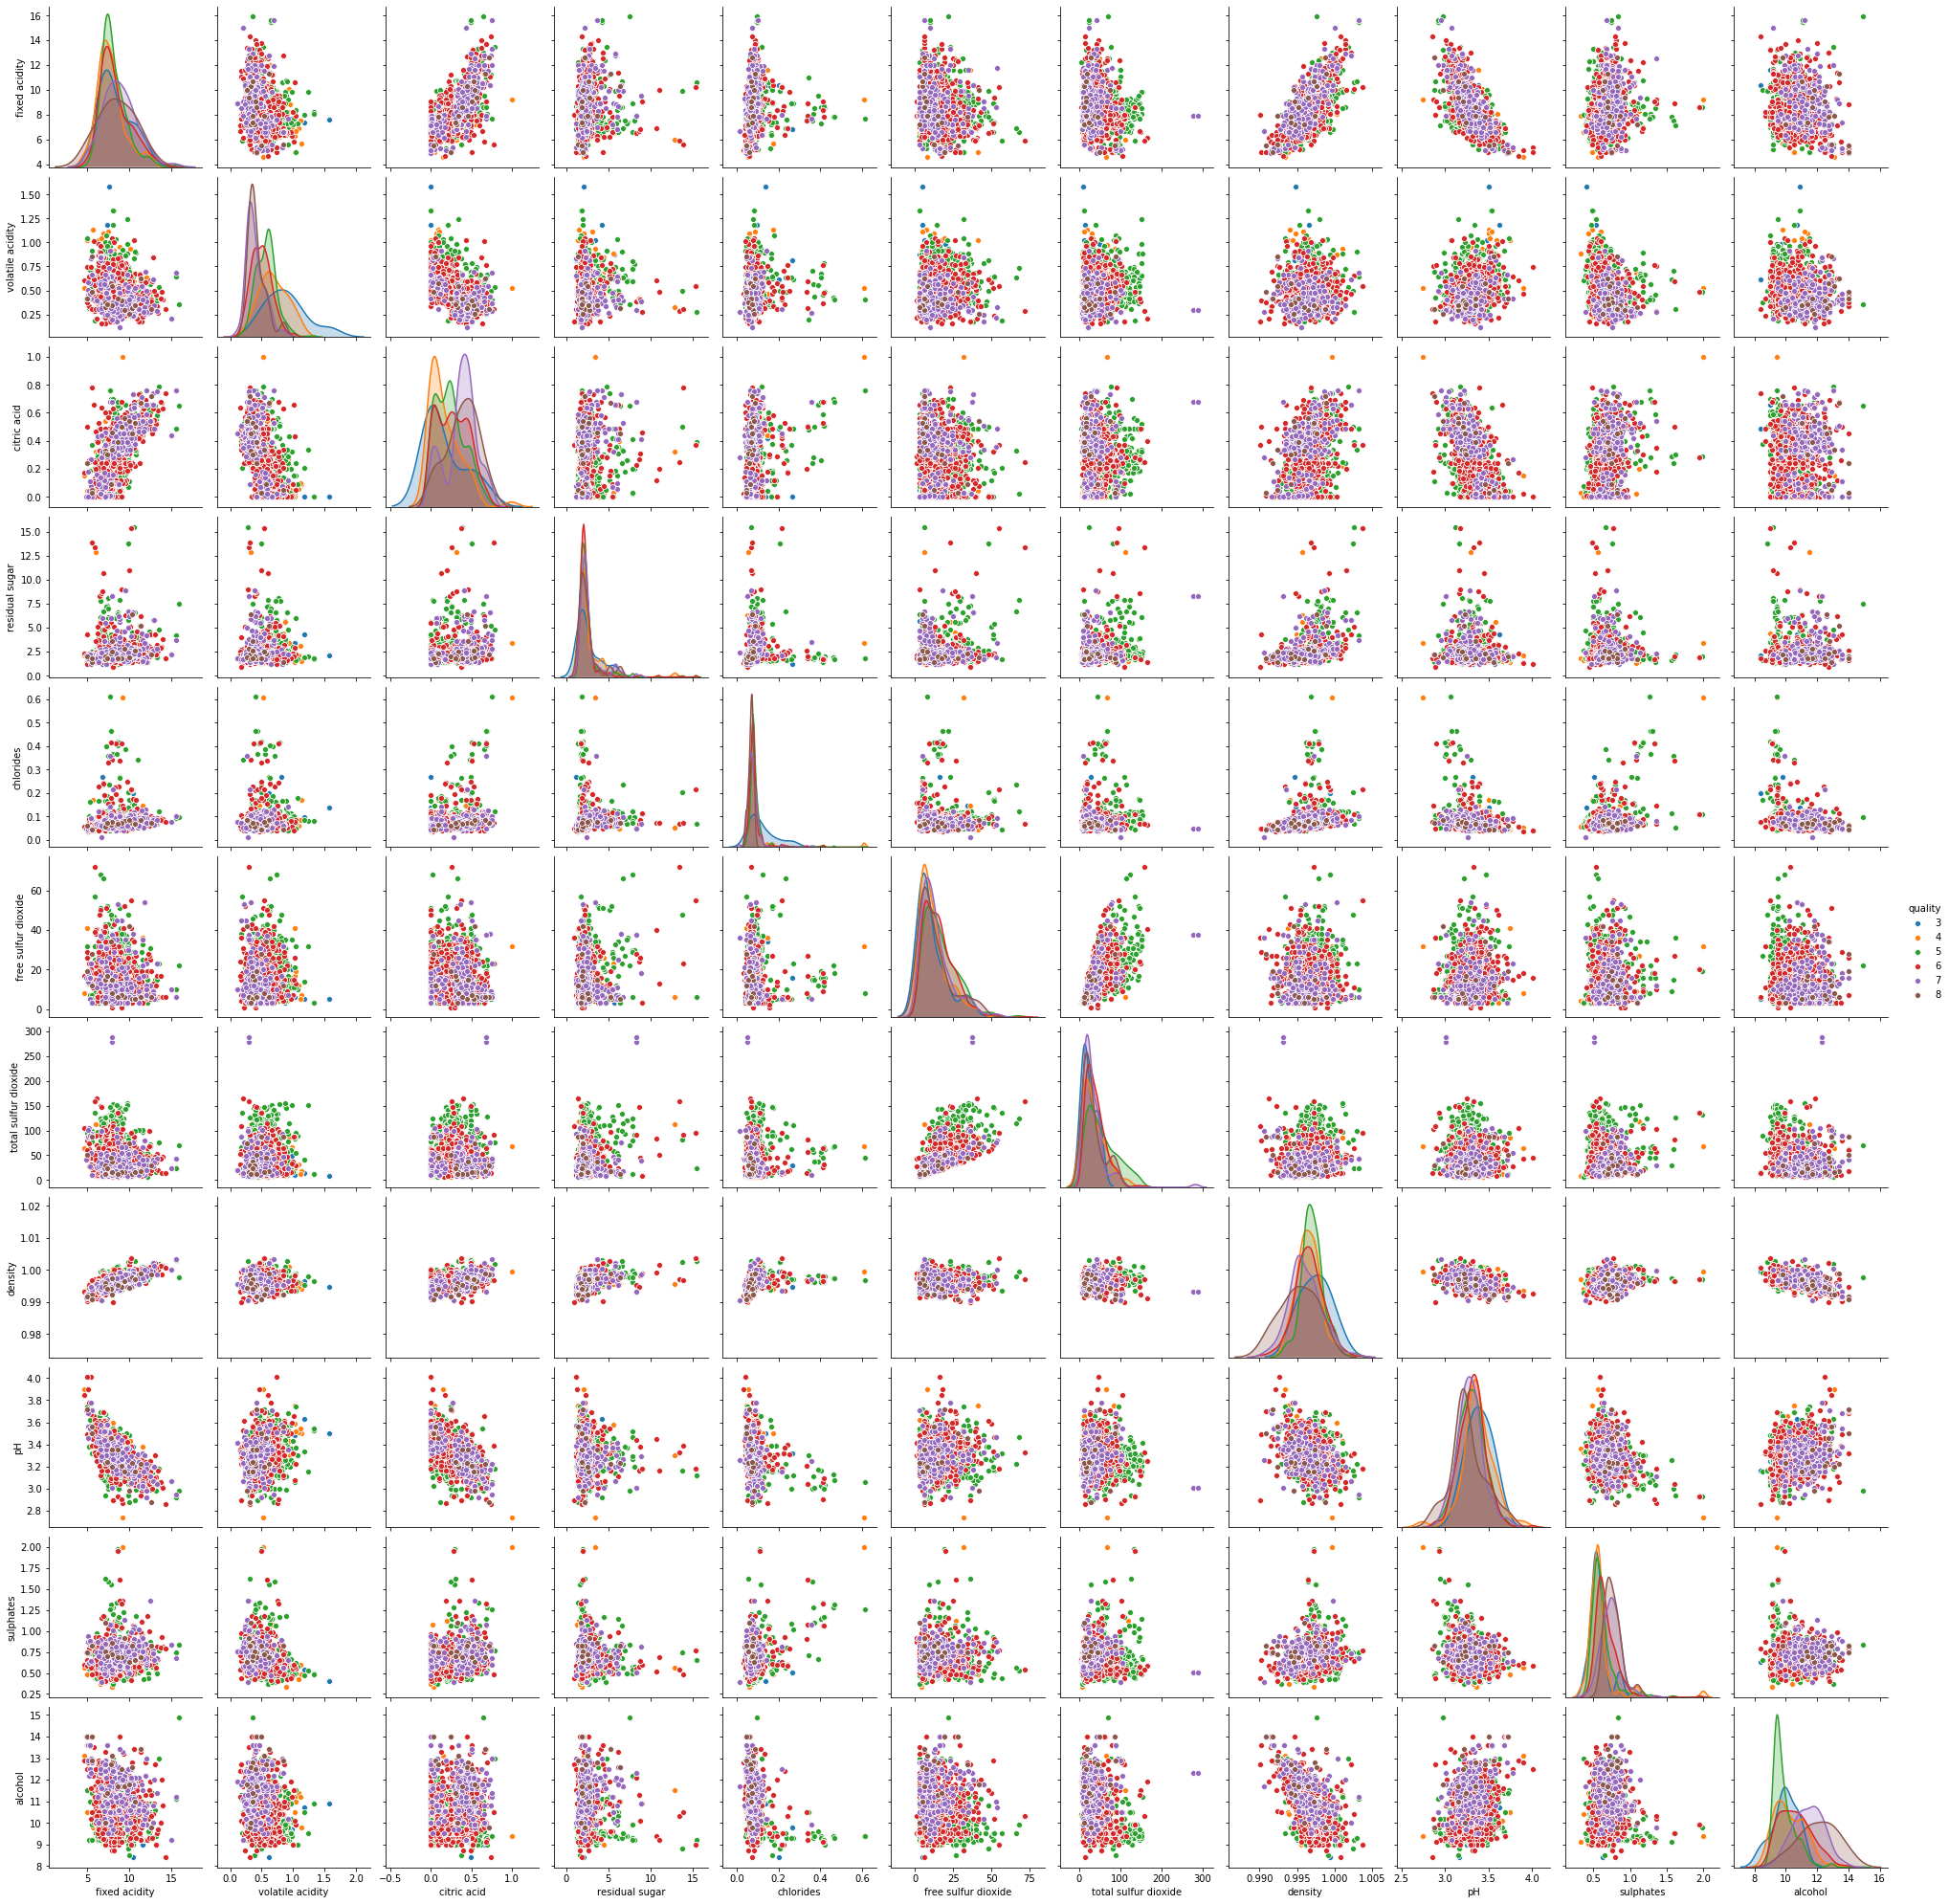

In [16]:
# Visualizing the multidimensional relationships among the samples is as easy as calling sns.pairplot
sns.pairplot(data, hue='quality', size=2.5)
plt.show()

In [17]:
def get_features(data,correlation_threshold):
    """Returns features whose correlation is above a threshold value"""
    correlations = data.corr()['quality'].drop('quality')
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [18]:
get_features(data,0.05)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [19]:
features_select = get_features(data,0.05)

In [20]:
# selected features
print(features_select)

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [21]:
x = data[features_select] 
y = data['quality']

In [22]:
# Train test split 
# 30% of the data is used for testing and 70% for training.
# Checking the size of the dataset using x_train.shape
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3)
print('Total dataset size:',x.shape)
print('Train dataset size:',x_train.shape)
print('Test dataset size:',x_test.shape)


Total dataset size: (1599, 10)
Train dataset size: (1119, 10)
Test dataset size: (480, 10)


In [23]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)
  
# this gives the coefficients of the 10 features selected above.  
print(regressor.coef_)

[ 2.09748604e-03 -9.91919438e-01 -1.59101559e-01 -1.60571078e+00
  7.14909239e-03 -4.21570406e-03  1.36683325e+01 -4.91369830e-01
  8.06320421e-01  3.10221686e-01]


In [24]:
# predict on train and test set
train_pred = regressor.predict(x_train)
test_pred = regressor.predict(x_test)

# round up predictions 
train_pred = np.round_(train_pred)
test_pred = np.round_(test_pred)

In [25]:
# calculating rmse
train_rmse = metrics.mean_squared_error(train_pred, y_train) ** 0.5
print('Train RMSE:',train_rmse)
test_rmse = metrics.mean_squared_error(test_pred, y_test) ** 0.5
print('Test RMSE:',test_rmse)

Train RMSE: 0.7124577657081042
Test RMSE: 0.6922186552431729


In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.425
Mean Squared Error: 0.4791666666666667
Root Mean Squared Error: 0.6922186552431729


In [27]:
# displaying coefficients of each feature
coeffecients = pd.DataFrame(regressor.coef_,features_select) 
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

                      Coeffecient
fixed acidity            0.002097
volatile acidity        -0.991919
citric acid             -0.159102
chlorides               -1.605711
free sulfur dioxide      0.007149
total sulfur dioxide    -0.004216
density                 13.668333
pH                      -0.491370
sulphates                0.806320
alcohol                  0.310222


*Obeservation* 

These numbers mean that holding all other features fixed, a 1 unit increase in sulphates will lead to an increase of 0.8 in quality of wine, and similarly for the other features.
Also holding all other features fixed, a 1 unit increase in volatile acidity will lead to a decrease of 0.99 in quality of wine, and similarly for the other features.

<h3> Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor 

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train,y_train)

# predict on train and test set
train_pred = rf_regressor.predict(x_train)
test_pred = rf_regressor.predict(x_test)

# round up predictions 
train_pred = np.round_(train_pred)
test_pred = np.round_(test_pred)

# calculating rmse
train_rmse = metrics.mean_squared_error(train_pred, y_train) ** 0.5
print('Train RMSE:',train_rmse)
test_rmse = metrics.mean_squared_error(test_pred, y_test) ** 0.5
print('Test RMSE:',test_rmse)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

In [ ]:
# displaying feature importance of each feature
feat_imp = pd.DataFrame(rf_regressor.feature_importances_,features_select) 
feat_imp.columns = ['Feature_Importance'] 
print(feat_imp)